In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings(action='ignore')

In [45]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')
df_t = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_test.csv')

In [19]:
df.corr()['SalePrice'].sort_values(ascending = False)

# 상관계수가 높다고 공선성이 높은 것은 아님. vif를 확인해봐야 한다.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### 다중 회귀

다중 회귀는 2 개 이상의 feature(독립 변수) 데이터를 예측하는 것.

  $ y = {\alpha_{1}}x_1 + {\alpha_{2}}x_2 + ... + {\alpha_{n}}x_n + \beta $

독립 변수라는 말의 의미와 같이 각 feature들은 서로 독립적이여야 하며,

만약 독립적이지 않다면 다중공선성의 문제가 발생할 수 있음.

(분산팽창계수 vif를 통해 확인가능. from statsmodels.stats.outliers_influence import variance_inflation_factor (라이브러리))


In [35]:
# SalePrice와 상관계수가 높은 상위 3개 feature를 채택.
# 다중 선형 회귀 모델.

features = ["OverallQual", "GrLivArea", "GarageCars"] # 독립변수는 항상 2차원으로
target = "SalePrice" # 종속변수는 항상 1차원

X = df[features]
y = df[target]

In [36]:
multiple_ols = LinearRegression()
multiple_ols.fit(X, y)

LinearRegression()

### 다항 회귀

다중 회귀에서 독립 변수들의 차수만 높인 형태.

  $ y = {\alpha_{1}}x_1 + {\alpha_{2}}x_2 + {\alpha_{1}}x_1^2 + {\alpha_{2}}x_2^2 + {\alpha_{1}}{x_1}{x_2} + \beta $

만약 데이터가 선형의 모양이긴 하지만, 살짝 굴곡져있다면 고려해보아야 합니다.

일반적인 단순 선형 회귀 모델보다 더 설명력이 높을 수 있어서입니다.

주의할 점은 "x값의 차수가 늘어나면 그게 선형이 맞나?" 라는 생각은 틀렸습니다. (저도 그렇게 생각했었어요)

왜냐하면 선형성이라는 것은 회귀계수(x의 계수)로 정해지기 때문입니다. 유념해주시길 바랍니다. (이해하기 힘들었어요..)

In [37]:
# 파이프라인을 이용하여 쉽게 다항회귀모델을 만들 수 있습니다.

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

poly = PolynomialRegression(degree = 2)
poly.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

MSE	Linear : 569.78,	poly: 61.33
R2	Linear : 0.83,    	poly: 0.98


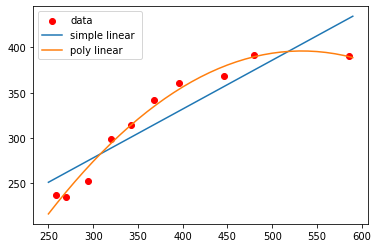

In [66]:
# 이해를 위한 그림

X = np.array([258, 270, 294, 320, 342,
              368, 396, 446, 480, 586])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2,
              342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()


quadratic = PolynomialFeatures(degree=2, include_bias=True)

X_quad = quadratic.fit_transform(X)

lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))


y_linpred = lr.predict(X)
y_polypred = pr.predict(X_quad)

mse_lin = mean_squared_error(y, y_linpred)
mse_poly = mean_squared_error(y, y_polypred)

r2_lin = r2_score(y, y_linpred)
r2_poly = r2_score(y, y_polypred)

print(f'MSE\tLinear : {mse_lin:.2f},\tpoly: {mse_poly:.2f}')
print(f'R2\tLinear : {r2_lin:.2f},    \tpoly: {r2_poly:.2f}')

plt.scatter(X, y, label='data', c = 'red')
plt.plot(X_fit, y_lin_fit, label='simple linear ')
plt.plot(X_fit, y_quad_fit, label='poly linear')
plt.legend()
plt.show()